In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as sm
from sklearn import datasets, linear_model, metrics 

In [2]:
df = pd.read_csv('train_NIR5Yl1.csv')

In [3]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


# Data Preprocesing and Visualisation

In [4]:
df.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [5]:
df.ID.count()

330045

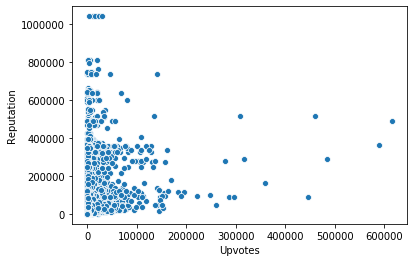

In [85]:
sb.scatterplot(x=df.Upvotes, y=df.Reputation )

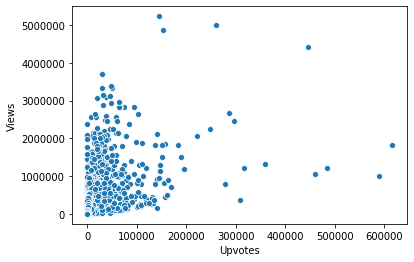

In [86]:
sb.scatterplot(x=df.Upvotes, y=df.Views )

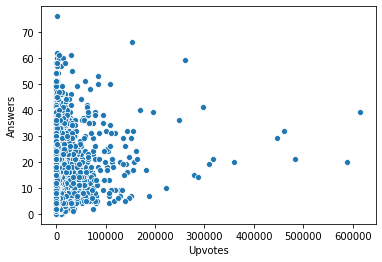

In [87]:
sb.scatterplot(x=df.Upvotes, y=df.Answers )

In [88]:
df = df.drop(columns='ID')

In [89]:
df = df.apply(LabelEncoder().fit_transform)

# Algorithms

In [90]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [91]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

In [92]:
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, Y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, Y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, Y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, Y_pred), 2)) 
print("R2 score =", round(sm.r2_score(Y_test, Y_pred), 2))

Mean absolute error = 61.4
Mean squared error = 31730.29
Median absolute error = 15.02
Explain variance score = 0.94
R2 score = 0.94


In [96]:
lReg = linear_model.LinearRegression() 
lReg.fit(X_train, Y_train) 
print("R2 score =", format(lReg.score(X_test, Y_test))) 

R2 score = 0.4193436484253955


In [95]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, Y_train)
print(knn.score(X_test, Y_test))

0.8981220615367869
